# Рабочая тетрадь 3
## Лищенко Т.В. ИМБО-01-22

# 1.1. Теоретический материал – Функции Python

Перед тем как рассматривать задачи классификации вспомним
понятие функции (метода) в Python. Функция в python - объект,
принимающий аргументы и возвращающий значение. Обычно функция
определяется с помощью инструкции `def`.

Определим простейшую функцию:
``` python
def add(x, y):
 return x + y
```

Инструкция return говорит, что нужно вернуть значение. В нашем
случае функция возвращает сумму x и y. Теперь мы ее можем вызвать:

``` python
add(1, 10)
add('abc', 'def')
'abcdef'
```

Функция может быть любой сложности и возвращать любые объекты
(списки, кортежи, и даже функции):
``` python
def newfunc(n):
 def myfunc(x):
 return x + n
 return myfunc
new = newfunc(100) # new - это функция
new(200)
```

Функция может и не заканчиваться инструкцией return, при этом
функция вернет значение None:
``` python
def func():
 pass
print(func())
```
Функция может принимать произвольное количество аргументов или
не принимать их вовсе. Также распространены функции с произвольным
числом аргументов, функции с позиционными и именованными
аргументами, обязательными и необязательными.
``` python
def func(*args):
 return args
func(1, 2, 3, 'abc')
(1, 2, 3, 'abc')
func()
()
func(1)
(1,)
```
Как видно из примера, args - это кортеж из всех переданных
аргументов функции, и с переменной можно работать также, как и с
кортежем.
Функция может принимать и произвольное число именованных
аргументов, тогда перед именем ставится **:
``` python
def func(**kwargs):
 return kwargs
func(a=1, b=2, c=3)
{'a': 1, 'c': 3, 'b': 2}
func()
{}
func(a='python')
{'a': 'python'}
```

In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## 1.1.1 Пример

In [2]:
def sum_range(start, end):
    if start > end:
        end, start = start, end
    return sum(range(start, end + 1))

In [3]:
print(sum_range(2, 12))
print(sum_range(-4, 4))
print(sum_range(3, 2))

77
0
5


## 1.1.2 Пример

In [4]:
def fact(num):
    if num == 0:
        return 1
    else:
        return num * fact(num - 1)
print(fact(5))

120


# 1.1. Теоретический материал – Расстояние между объектами класса 

Сходство или различие между объектами классификации
устанавливается в зависимости от выбранного метрического расстояния
между ними. Если каждый объект описывается n свойствами (признаками),
то он может быть представлен как точка в n-мерном пространстве, и
сходство с другими объектами будет определяться как соответствующее
расстояние. При классификации используются различные меры расстояния
между объектами.

1. *Евклидово расстояние*

Это, пожалуй, наиболее часто используемая мера расстояния. Она
является геометрическим расстоянием в многомерном пространстве и
вычисляется следующим образом:

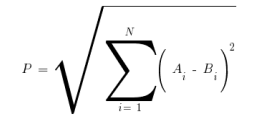
где
 - расстояние между объектами A и B;
 - значение i-свойства объекта A;
 - значение i-свойства объекта B.
 
2. *Квадрат евклидова расстояния*

Данная мера расстояния используется в тех случаях, когда требуется
придать больше значение более отдаленным друг от друга объектам. Это
расстояние вычисляется следующим образом:

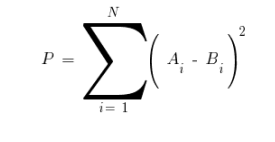

3. *Взвешенное евклидово расстояние*

Применяется в тех случаях, когда каждому i-свойству удается приписать
некоторый «вес» wi, пропорционально степени важности признака в задаче
классификации:

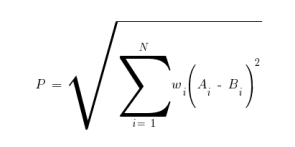

4. *Хеммингово расстояние*

Также называется манхэттенским, сити-блок расстоянием или расстоянием
городских кварталов. Это расстояние является разностью по координатам.
Хеммингово расстояние вычисляется по формуле:

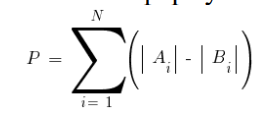

5. *Расстояние Чебышева*

Принимает значение наибольшего модуля разности между значениями
соответствующих свойств (признаков) объектов:

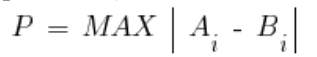

Выбор меры расстояния и весов для классифицирующих свойств –
очень важный этап, так как от этих процедур зависят состав и количество
формируемых классов, а также степень сходства объектов внутри классов.

## 1.2.3 Пример

In [5]:
import numpy as np
def euclidean_distance(v1, v2):
    return sum((x - y) ** 2 for x, y in zip(v1, v2)) ** 0.5

x = np.array([0,0,0])
y = np.array([3,3,3])
print(euclidean_distance(x,y))

5.196152422706632


## 1.2.4 Пример

In [6]:
def sqr_euclidean_distance(v1, v2):
    return sum((x - y) ** 2 for x, y in zip(v1, v2))

def weighted_euclidean_distance(v1, v2, w):
    return sum((x - y) ** 2 * s for x, y, s in zip(v1, v2, w)) ** 0.5

def manhattan_distance(v1, v2):
    return sum(abs(x - y) for (x, y) in zip(v1, v2))

def chebyshev_distance(v1, v2):
    return max(abs(x - y) for (x, y) in zip(v1, v2))

x = np.array([0,0,0])
y = np.array([3,3,3])
w = np.array([0,0,1])

In [7]:
print(sqr_euclidean_distance(x,y))
print(weighted_euclidean_distance(x,y,w))
print(manhattan_distance(x,y))
print(chebyshev_distance(x,y))

27
3.0
9
3


## 1.2.5 Пример

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

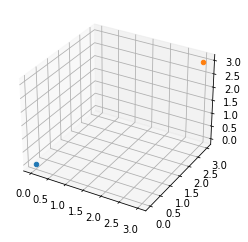

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(0, 0, 0)
ax.scatter(3, 3, 3)
plt.show()

## 1.2.6 Пример

In [11]:
#Расстояние Евклида
print(np.linalg.norm(x-y))
#Квадрат Еввклидова расстояния
print(np.linalg.norm(x-y) ** 2)
#Расстояние Чебышева
print(np.linalg.norm(x-y, ord=np.inf))
#Расстояние Хемминга
print(np.linalg.norm(x-y, ord=1))

5.196152422706632
27.0
3.0
9.0


## 1.3.1 Задание

## 1.3.2 Задание

In [12]:
Z = np.zeros((5,5))
Z += np.arange(5)
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


# Задачи классификации

## 2.2.1 Пример

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# данные
x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]


# обучаем модель k-ближайших соседей к данным
k = 3

model = KNeighborsClassifier(n_neighbors = k)
model.fit(x, target)
print(model)

# делаем прогноз
print("(-2,-2) is class"),
print(model.predict([[-2,-2]]))

print("(1,3) is class"),
print(model.predict([[1,3]]))

KNeighborsClassifier(n_neighbors=3)
(-2,-2) is class
[0]
(1,3) is class
[1]


## 2.2.2 Пример

In [15]:
import seaborn as sns

In [16]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 2.2.3 Пример

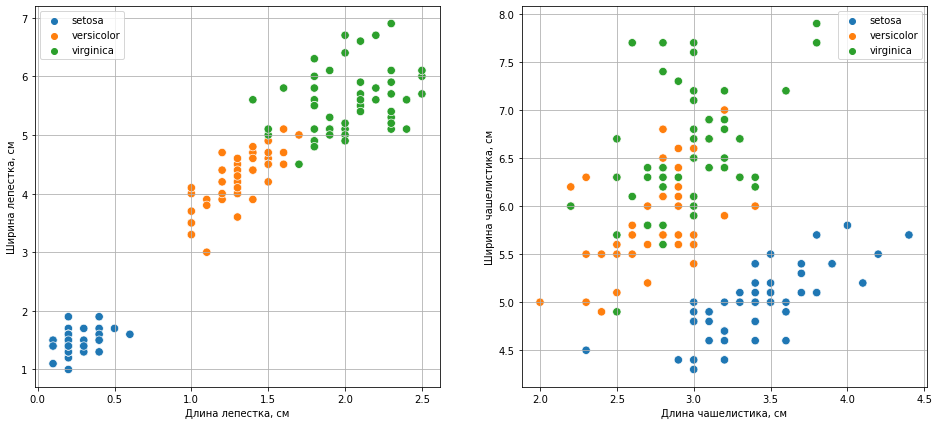

In [17]:
# Объявляем фигуру из двух графиков и ее размер
plt.figure(figsize=(16, 7))

# Левый график
plt.subplot(121)
sns.scatterplot(
    data=iris, # из этой таблиц нарисовать точки
    x="petal_width", y="petal_length", # с этими координатами
    hue="species", # для которых цвет определить согласно этому столбцу
    s=70 # размер точек

)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")
plt.legend() # добавить легенду
plt.grid() # добавить сетку

# Правый график аналогично
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', hue="species", s=70)
plt.xlabel("Длина чашелистика, см")
plt.ylabel("Ширина чашелистика, см")
plt.legend()
plt.grid();


## 2.2.4 Пример

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    # поскольку iris это pandas-таблица, для нее нужно указать iloc
    iris.iloc[:, :-1], # берем все колонки кроме последней в признаки
    iris.iloc[:, -1], # последнюю в целевую переменную (класс)
    test_size = .2 # размер тестовой выборки (20%)
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [20]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
45,4.8,3.0,1.4,0.3
42,4.4,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
67,5.8,2.7,4.1,1.0
11,4.8,3.4,1.6,0.2


In [21]:
y_train.head()

45        setosa
42        setosa
3         setosa
67    versicolor
11        setosa
Name: species, dtype: object

In [22]:
# Обучим метод трех ближайших соседей
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
# Получим предсказания модели
y_pred = model.predict(x_test)
y_pred

array(['virginica', 'virginica', 'setosa', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'versicolor'],
      dtype=object)

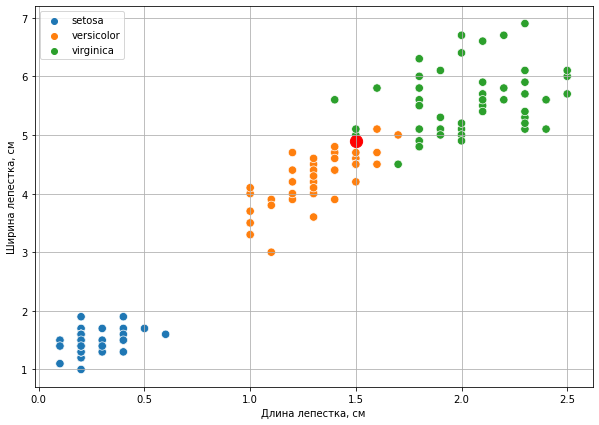

In [23]:
# покажем на графике, что отражает полученное число
# Красным цветом обозначим точки, для которых классификация сработала неправильно
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")
plt.legend(loc=2)
plt.grid()
# Перебираем все объекты из теста
for i in range(len(y_test)):
    # Если предсказание неправильное
    if np.array(y_test)[i] != y_pred[i]:
        # То подсвечиваем точку красным
        plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], color='red', s=150)

In [24]:
# Качество модели (доля правильно классифицированных точек)
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

accuracy: 0.967


## 2.3.1 Задание

# Работа с категориальными данными

In [25]:
import pandas as pd

## 3.2.1 Пример

In [26]:
# Создать признаки
dataframe = pd.DataFrame({"оценка" : ["низкая", "низкая", "средняя", "средняя", "высокая"]})
# Создать словарь преобразованя шкалы
scale_mapper = {"низкая":1, "средняя":2, "высокая":3}
# Заменить значения признаков значениями словаря
dataframe["оценка"].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: оценка, dtype: int64

## 3.2.2 Пример

In [27]:
from sklearn.feature_extraction import DictVectorizer
# Создать словарь
data_dict = [{"красный":2, "синий":4},
             {"красный":4, "синий":3},
             {"красный":1, "желтый":2},
             {"красный":2, "желтый":2}]
# Создать векторизатор словаря
dictvectorizer = DictVectorizer(sparse=False)
# Конвертировать словарь в матрицу признаков
features = dictvectorizer.fit_transform(data_dict)
features

array([[0., 2., 4.],
       [0., 4., 3.],
       [2., 1., 0.],
       [2., 2., 0.]])

## 3.3.1 Задание